In [1]:
import pandas as pd

In [2]:
file_names_fake = pd.read_csv('C:\\Users\\Lucas Choconi\\Documents\\DH\\Datasets\\fakenews\Fake.csv')
file_names_fake['real'] = 'Fake'
file_names_true = pd.read_csv('C:\\Users\\Lucas Choconi\\Documents\\DH\\Datasets\\fakenews\True.csv')
file_names_true['real'] = 'True'
file_names = file_names_fake.append(file_names_true, ignore_index=True)
file_names.head()

,title,text,subject,date,real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [31]:
file_names.isna().sum()

title      0
text       0
subject    0
date       0
real       0
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(file_names, test_size=0.2, random_state=25)
data_train = data_train.sample(5000)
data_test = data_test.sample(5000)

In [4]:
from nltk import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
def clean_review(review_text, tokenizer, stemmer, stopwords):    
    
    #tokens (eliminamos todos los signos de puntuación)
    words = tokenizer.tokenize(review_text)
    
    # stemming: raiz y minúsculas:
    stem_words = [stemmer.stem(x) for x in words]
    
    # eliminamos stopwords (ya pasaron por stem)
    clean_words = [x for x in stem_words if x not in stopwords]
    
    result = " ".join(clean_words)
    
    return(result)

In [6]:
tokenizer = RegexpTokenizer(r"\w+")
englishStemmer = SnowballStemmer("english")
stopwords_en = stopwords.words('english');
stopwords_en_stem = [englishStemmer.stem(x) for x in stopwords_en]

In [7]:
import numpy as np
from tqdm import tqdm
tqdm.pandas()

clean_train = data_train.text.progress_apply(lambda x: clean_review(x, tokenizer, englishStemmer, stopwords_en_stem))
clean_test = data_test.text.progress_apply(lambda x: clean_review(x, tokenizer, englishStemmer, stopwords_en_stem))


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [01:07<00:00, 73.98it/s]


In [8]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(clean_train)
X_train_sparse = count_vectorizer.transform(clean_train)
X_test_sparse = count_vectorizer.transform(clean_test)

In [9]:
X_train = pd.DataFrame(X_train_sparse.todense(), 
             columns = count_vectorizer.get_feature_names()) 
y_train = data_train.real

In [10]:
X_test = pd.DataFrame(X_test_sparse.todense(), 
             columns = count_vectorizer.get_feature_names()) 
y_test = data_test.real

In [24]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text_fake = " ".join(text for text in file_names[file_names['real']=='Fake'].text)
text_true = " ".join(text for text in file_names[file_names['real']=='True'].text)
wordcloud_fake = WordCloud(stopwords=stopwords_en, max_words=100, background_color="white").generate(text_fake)
wordcloud_true = WordCloud(stopwords=stopwords_en, max_words=100, background_color="white").generate(text_true)

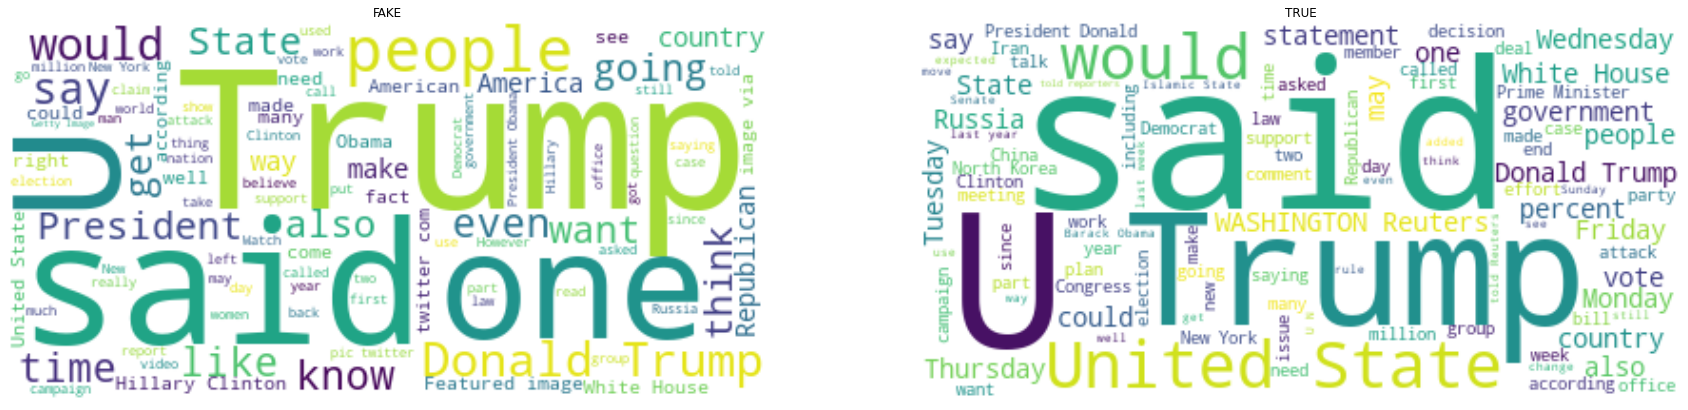

In [52]:
fig, axs = plt.subplots(1, 2,figsize=(30,10))

# Display the generated image:
axs[0].imshow(wordcloud_fake, interpolation='bilinear')
axs[0].axis("off")
axs[0].title.set_text('FAKE')
axs[1].imshow(wordcloud_true, interpolation='bilinear')
axs[1].axis("off")
axs[1].title.set_text('TRUE')
plt.show()

## Modelo de Reg. Logistica

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [12]:
reg_model = LogisticRegression(C = 0.05, solver="newton-cg", penalty="l2")
reg_model.fit(X_train, y_train)
print ("Final Accuracy: %s" 
        % accuracy_score(y_test, reg_model.predict(X_test)))

Final Accuracy: 0.985


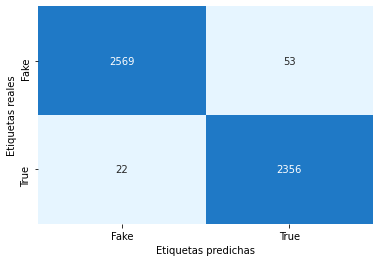

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
myColors = ((0.90, 0.96, 1, 1), (0.70, 0.87, 1, 1), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', myColors,10)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, reg_model.predict(X_test))
axis_labels = np.sort(y_test.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Naive Bayes

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
NB_model.score(X_test, y_test)

0.9392

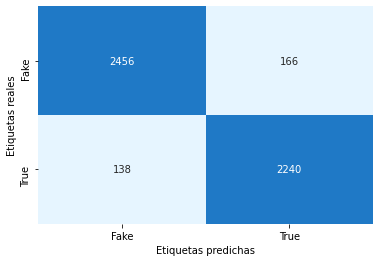

In [15]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
myColors = ((0.90, 0.96, 1, 1), (0.70, 0.87, 1, 1), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', myColors,10)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, NB_model.predict(X_test))
axis_labels = np.sort(y_test.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Truncando palabras

In [16]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 200);

X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [17]:
reg_model_svd = LogisticRegression(C = 0.01, solver="newton-cg", penalty="l2")
reg_model_svd.fit(X_train_svd, y_train)
reg_model_svd.score(X_test_svd, y_test)

0.9688

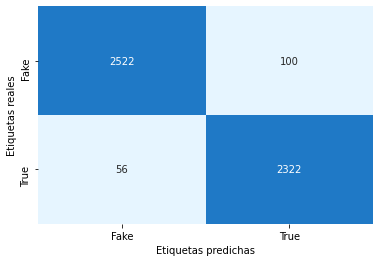

In [18]:
myColors = ((0.90, 0.96, 1, 1), (0.70, 0.87, 1, 1), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', myColors,10)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, reg_model_svd.predict(X_test_svd))
axis_labels = np.sort(y_test.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

Con conjunto de palabras

In [19]:
count_vectorizer_bigram = CountVectorizer(ngram_range = (1, 2))
count_vectorizer_bigram.fit(clean_train)
X_train_bigram_sparse = count_vectorizer_bigram.transform(clean_train)
X_test_bigram_sparse = count_vectorizer_bigram.transform(clean_test)

In [20]:
reg_model_bigram = LogisticRegression(C = 0.25, solver="newton-cg", penalty="l2")
reg_model_bigram.fit(X_train_bigram_sparse, y_train)
reg_model_bigram.score(X_test_bigram_sparse, y_test)

0.9856

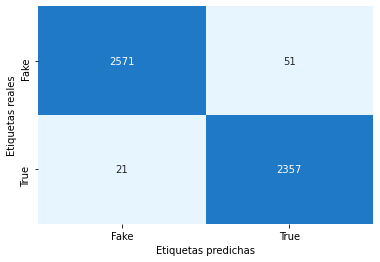

In [21]:
myColors = ((0.90, 0.96, 1, 1), (0.70, 0.87, 1, 1), (0, 0.40, 0.75, 0.88))
cmap = LinearSegmentedColormap.from_list('Custom', myColors,10)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cm = confusion_matrix(y_test, reg_model_bigram.predict(X_test_bigram_sparse))
axis_labels = np.sort(y_test.unique())
sns.heatmap(cm, xticklabels=axis_labels, yticklabels=axis_labels, cbar=False, annot=True, cmap=cmap, fmt='g')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');